In [1]:
import matplotlib.pyplot as plt
import solver
import bandit

In [2]:
def loop(bandit, solvers, N):
    O = { s: [] for s in solvers }
    for n in range(N):
        for s in solvers:
            a = s.select()
            r = bandit(a)
            s.update(a, r)
            O[s].append(a == bandit.o)
    return O

In [3]:
def average(iters, N, bandit, solvers):
    O = { s: [0 for _ in range(N) ] for s in solvers }
    for i in range(iters):
        bandit.reset()  
        new = loop(bandit, solvers, N)
        for s in solvers:
            s.reset()
            for step in range(N):
                O[s][step] += 1 / (i+1) * (new[s][step] - O[s][step])
    return O

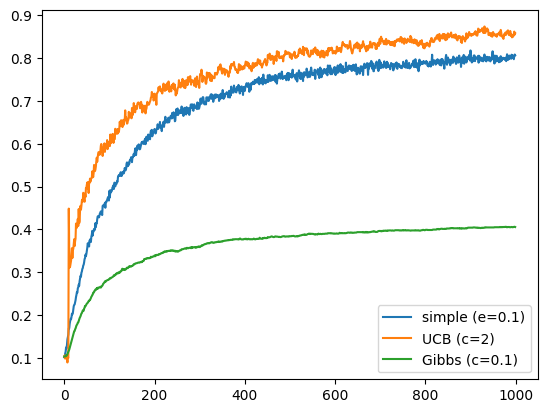

In [5]:
k = 10
b = bandit.Stationary(k)
solvers = [
    solver.Simple(k, 0.1),
    # solver.Simple(k, 0.01),
    # solver.Optimist(k, 0, 5),
    solver.UCB(k, 2),
    solver.Gibbs(k, 0.1)
]
out = average(2000, 1000, b, solvers)
for s in solvers:
    plt.plot(out[s], label=str(s))
plt.legend()
plt.show()